In [1]:
import pandas as pd
pgaTourData = pd.read_csv("pgaTourData.csv")

## Exploration of data

In [2]:
pgaTourData.head(10)

,PlayerName,Rounds,FairwayPercentage,Year,AvgDistance,gir,AveragePutts,AverageScrambling,AverageScore,Points,Wins,Top10,AveragSGPutts,AveragSGTotal,SG-OTT,SG-APR,SG-ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"
5,Brian Gay,103.0,71.37,2018,282.9,64.52,28.25,63.26,70.280,880,NaN,6.0,0.442,0.565,-0.166,0.036,0.253,"$2,152,501"
6,Kyle Stanley,93.0,71.29,2018,295.7,71.09,29.89,54.80,70.404,"1,198",NaN,5.0,0.037,0.686,0.378,0.298,-0.027,"$3,916,001"
7,Emiliano Grillo,94.0,70.16,2018,295.2,68.84,29.04,61.05,70.152,901,NaN,5.0,0.546,1.133,0.364,0.345,-0.122,"$2,493,163"
8,Russell Henley,77.0,70.03,2018,293.0,68.77,29.80,54.33,70.489,569,NaN,3.0,0.167,0.541,0.093,0.467,-0.186,"$1,516,438"
9,Jim Furyk,50.0,69.91,2018,280.5,63.19,28.73,62.58,70.342,291,NaN,2.0,0.389,0.412,-0.392,0.179,0.235,"$660,010"


In [3]:
pgaTourData.dtypes

PlayerName            object
Rounds               float64
FairwayPercentage    float64
Year                   int64
AvgDistance          float64
gir                  float64
AveragePutts         float64
AverageScrambling    float64
AverageScore         float64
Points                object
Wins                 float64
Top10                float64
AveragSGPutts        float64
AveragSGTotal        float64
SG-OTT               float64
SG-APR               float64
SG-ARG               float64
Money                 object
dtype: object

Some of the data types of the variables are incorrect. e.g Points and Money.

Next step: change the data type of these variabels

In [4]:
# convert Points by deleting the commas 
pgaTourData['Points'] = pgaTourData['Points'].astype(str)
pgaTourData['Points'] = pgaTourData['Points'].str.replace(',','')
pgaTourData['Points'] = pd.to_numeric(pgaTourData['Points'], errors='coerce')

In [5]:
pgaTourData.Points

0        868.0
1       1006.0
2       1020.0
3        795.0
4        421.0
         ...  
2307       NaN
2308       NaN
2309       NaN
2310       NaN
2311       NaN
Name: Points, Length: 2312, dtype: float64

In [6]:
# convert Money by deleting commas and money sign
pgaTourData['Money'] = pgaTourData['Money'].astype(str)
pgaTourData['Money'] = pgaTourData['Money'].str.replace(',','')
pgaTourData['Money'] = pgaTourData['Money'].str.replace('$','')
pgaTourData['Money'] = pd.to_numeric(pgaTourData['Money'], errors='coerce')

<ipython-input-6-ddb91cbff0e3>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  pgaTourData['Money'] = pgaTourData['Money'].str.replace('$','')


In [7]:
pgaTourData.Money

0       2680487.0
1       2485203.0
2       2700018.0
3       1986608.0
4       1089763.0
          ...    
2307      16943.0
2308      12827.0
2309      10159.0
2310       9165.0
2311       6552.0
Name: Money, Length: 2312, dtype: float64

In [8]:
pgaTourData.corr()

,Rounds,FairwayPercentage,Year,AvgDistance,gir,AveragePutts,AverageScrambling,AverageScore,Points,Wins,Top10,AveragSGPutts,AveragSGTotal,SG-OTT,SG-APR,SG-ARG,Money
Rounds,1.000000,0.083597,0.078522,0.069599,0.252190,-0.125943,0.227928,-0.313380,0.364636,-0.097741,0.211198,0.173218,0.317011,0.164208,0.192764,0.112364,0.278091
FairwayPercentage,0.083597,1.000000,-0.111042,-0.533832,0.343115,0.162757,0.236281,-0.170017,0.032302,-0.098652,0.024990,-0.043493,0.162458,0.179032,0.155015,0.000356,0.016237
Year,0.078522,-0.111042,1.000000,0.221102,-0.000044,-0.145524,0.107181,-0.006801,0.037022,0.060289,0.076493,0.023785,0.029939,0.003330,0.009928,0.035493,0.081792
AvgDistance,0.069599,-0.533832,0.221102,1.000000,0.292965,0.167314,-0.228979,-0.273230,0.281107,0.247126,0.226512,-0.136676,0.278923,0.604456,0.142217,-0.191637,0.329295
gir,0.252190,0.343115,-0.000044,0.292965,1.000000,0.549402,0.038068,-0.485030,0.303183,0.267357,0.276390,-0.231629,0.487778,0.582466,0.577074,-0.103955,0.313770
AveragePutts,-0.125943,0.162757,-0.145524,0.167314,0.549402,1.000000,-0.549805,0.263041,-0.282488,-0.209932,-0.245181,-0.720328,-0.265734,0.293925,0.133635,-0.449081,-0.257832
AverageScrambling,0.227928,0.236281,0.107181,-0.228979,0.038068,-0.549805,1.000000,-0.518057,0.344421,0.248329,0.311253,0.458220,0.517527,-0.024871,0.196124,0.613776,0.317777
AverageScore,-0.313380,-0.170017,-0.006801,-0.273230,-0.485030,0.263041,-0.518057,1.000000,-0.763993,-0.477661,-0.700529,-0.364817,-0.962318,-0.530624,-0.669370,-0.390284,-0.746499
Points,0.364636,0.032302,0.037022,0.281107,0.303183,-0.282488,0.344421,-0.763993,1.000000,0.746627,0.823495,0.297614,0.761594,0.437439,0.521278,0.284049,0.955490
Wins,-0.097741,-0.098652,0.060289,0.247126,0.267357,-0.209932,0.248329,-0.477661,0.746627,1.000000,0.450695,0.216024,0.470284,0.244059,0.348876,0.217539,0.721482


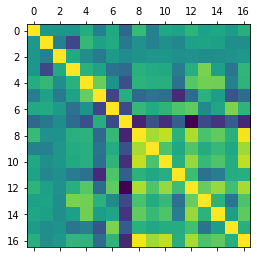

In [9]:
import matplotlib.pyplot as plt
plt.matshow(pgaTourData.corr())
plt.show()

## interesting facts
- average score and average SG (stoke gained) total -0.962 -> this is an obvious one because these two are both a measure of the score but with a different calculation method
- fairway percentage does not have any high correlation with everything else (thought there might be some)


In [10]:
pgaTourData.describe()

,Rounds,FairwayPercentage,Year,AvgDistance,gir,AveragePutts,AverageScrambling,AverageScore,Points,Wins,Top10,AveragSGPutts,AveragSGTotal,SG-OTT,SG-APR,SG-ARG,Money
count,1678.000000,1678.000000,2312.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,2296.000000,293.000000,1458.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,2.300000e+03
mean,78.711561,61.440560,2013.996107,290.807688,65.661675,29.163331,58.115638,70.921961,481.663328,1.218430,2.781893,0.025641,0.148105,0.037759,0.065015,0.019974,1.124903e+06
std,14.274137,5.058845,2.581176,8.916631,2.745411,0.518468,3.384769,0.698305,463.067732,0.573443,1.895094,0.343787,0.694923,0.379892,0.380952,0.223361,1.354085e+06
min,45.000000,43.020000,2010.000000,266.400000,53.540000,27.510000,44.010000,68.698000,1.000000,1.000000,1.000000,-1.475000,-3.209000,-1.717000,-1.680000,-0.930000,5.520000e+03
25%,69.000000,57.942500,2012.000000,284.900000,63.830000,28.810000,55.900000,70.494250,113.000000,1.000000,1.000000,-0.187000,-0.254750,-0.190250,-0.180750,-0.123000,1.853258e+05
50%,79.500000,61.430000,2014.000000,290.550000,65.790000,29.140000,58.275000,70.902000,381.500000,1.000000,2.000000,0.040000,0.147000,0.056000,0.081000,0.022000,6.994425e+05
75%,89.000000,64.910000,2016.000000,296.400000,67.580000,29.520000,60.420000,71.342750,676.000000,1.000000,4.000000,0.257000,0.568500,0.291500,0.314500,0.175000,1.526660e+06
max,120.000000,76.880000,2018.000000,319.700000,73.520000,31.000000,69.330000,74.400000,4169.000000,5.000000,14.000000,1.130000,2.406000,1.485000,1.533000,0.660000,1.203046e+07


## Stepwise Regression

In [11]:
import numpy as np
import statsmodels.api as sm

In [12]:
pgaTourData.columns.tolist()

['PlayerName',
 'Rounds',
 'FairwayPercentage',
 'Year',
 'AvgDistance',
 'gir',
 'AveragePutts',
 'AverageScrambling',
 'AverageScore',
 'Points',
 'Wins',
 'Top10',
 'AveragSGPutts',
 'AveragSGTotal',
 'SG-OTT',
 'SG-APR',
 'SG-ARG',
 'Money']

In [13]:
x_columns = pgaTourData.columns.tolist()
pgaTourData = pgaTourData.dropna()
y = pgaTourData["AverageScore"]

In [14]:
x_columns.remove("AverageScore")
x_columns.remove("PlayerName")

In [15]:
def get_stats():
    x = pgaTourData[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:           AverageScore   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.306e+06
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                        0.00
Time:                        13:48:56   Log-Likelihood:                          69.360
No. Observations:                 283   AIC:                                     -106.7
Df Residuals:                     267   BIC:                                     -48.39
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

#### The r-squrared value and the adjusted r-squared value are very interesting because they are alreay 1 without eliminating any variables. The values being one meaning that this model is already very accurate. To furthermore improve this model, I will be looking at the F-statistic value as an indication of how fit this model is. Also, I will be using backward stepwise regression method which is to eliminate one or two variables at a time and check the F-statistic value. In terms of elimination, I will be selecting the variables that have a higher p- value, indicating that it is not as statistically important as other variables.

In [16]:
x_columns.remove("Year") #year doesn't have any relation to the final score so I eliminate this one using my golf knowledge
get_stats()

                                 OLS Regression Results                                
Dep. Variable:           AverageScore   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.006e+05
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                        0.00
Time:                        13:48:56   Log-Likelihood:                         -187.99
No. Observations:                 283   AIC:                                      406.0
Df Residuals:                     268   BIC:                                      460.7
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [17]:
x_columns.remove("Top10")
x_columns.remove("Wins")
x_columns.remove("AveragSGTotal") 
#I'm actually suprised at how "AveragSGTotal" has a high p-value because strokegained is a measure of how good a shot is
get_stats()

                                 OLS Regression Results                                
Dep. Variable:           AverageScore   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.062e+05
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                        0.00
Time:                        13:48:56   Log-Likelihood:                         -188.03
No. Observations:                 283   AIC:                                      400.1
Df Residuals:                     271   BIC:                                      443.8
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [18]:
x_columns.remove("Points")
x_columns.remove("Rounds")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:           AverageScore   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.989e+05
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                        0.00
Time:                        13:48:56   Log-Likelihood:                         -191.08
No. Observations:                 283   AIC:                                      402.2
Df Residuals:                     273   BIC:                                      438.6
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [19]:
x_columns.remove("AveragSGPutts")
x_columns.remove("Money")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:           AverageScore   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.250e+05
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                        0.00
Time:                        13:49:44   Log-Likelihood:                         -196.66
No. Observations:                 283   AIC:                                      409.3
Df Residuals:                     275   BIC:                                      438.5
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [20]:
x_columns.append("Year")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:           AverageScore   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.737e+06
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                        0.00
Time:                        13:50:36   Log-Likelihood:                          8.4986
No. Observations:                 283   AIC:                                      1.003
Df Residuals:                     274   BIC:                                      33.81
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### As previously the variable "year" had a p-value of 0 before removing it from the x-varaiables, I decided to add this variable back to see what might happen. The f-statistic was boosted by a lot and it also affected the p-value of other variables such as "AveragScrambling" was boosted to 0.099. However, I still think that the year is irrelavant to the final outcome, AverageScore. So I will stil remove it.

In [21]:
x_columns.remove("Year")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:           AverageScore   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.250e+05
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                        0.00
Time:                        13:54:00   Log-Likelihood:                         -196.66
No. Observations:                 283   AIC:                                      409.3
Df Residuals:                     275   BIC:                                      438.5
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### This is my best model using stepwise regression model